# Stroke Detection

<img src="images/stroke_image.jpg" alt="Stroke" style="max-width: 100%;" width="350" align="left">

**OVERVIEW**

This projects explores building a best machine learning model that could diagnose the stroke using given patient data. By understanding Patient lifecycle, age and symptoms, this model could help doctors diagnose the stroke with better accuracy. This project involves the analysis of historical data, application of various regression models, and in-depth feature engineering and to provide actionable insights to both technical and non-technical stakeholders.


**BUSINESS UNDERSTANDING**

Stroke need to diagnosed quickly to react and save patient's life. Machine learning can provide early automated diagnosis of stroke using patient's lifecycle, age and symptoms that enable Doctors to act quickly to save patient life. 

**DATA UNDERSTANDING**

In [ ]:
# Core Libraries
import pandas as pd
import numpy as np
import os

# Plot libraries
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, explained_variance_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.compose import ColumnTransformer
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor


#set the plot size to 14" x 4"
plt.rcParams['figure.figsize'] = (18,5)

In [58]:
# Let's load the data
df = pd.read_csv('data/stroke_prediction_dataset.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [19]:
# Check for Missing Values
missing_values = (df.isna().mean() * 100).reset_index().rename(columns={"index": "Features", 0: "Missing %"})
missing_values["Missing %"] = round(missing_values["Missing %"])
missing_values

,Features,Missing %
0,Patient ID,0.0
1,Patient Name,0.0
2,Age,0.0
3,Gender,0.0
4,Hypertension,0.0
5,Heart Disease,0.0
6,Marital Status,0.0
7,Work Type,0.0
8,Residence Type,0.0
9,Average Glucose Level,0.0


In [160]:
# Let's look at object Columns..
obj_list = df.select_dtypes("object").columns.to_list()
for i in obj_list:
    print(df[i].value_counts())
    print("\n")

Patient Name
Ela Sarna                4
Nayantara Mammen         4
Anika Sachdeva           4
Riya Ghosh               4
Kanav Balay              3
                        ..
Aaryahi Bhattacharyya    1
Suhana Krish             1
Samaira Mane             1
Jivin Ramaswamy          1
Gokul Trivedi            1
Name: count, Length: 13818, dtype: int64


Gender
Male      7622
Female    7378
Name: count, dtype: int64


Marital Status
Single      5156
Divorced    4980
Married     4864
Name: count, dtype: int64


Work Type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: count, dtype: int64


Residence Type
Rural    7529
Urban    7471
Name: count, dtype: int64


Smoking Status
Currently Smokes    5011
Non-smoker          5009
Formerly Smoked     4980
Name: count, dtype: int64


Alcohol Intake
Rarely              3821
Social Drinker      3745
Never               3729
Frequent Drinker    3705
Name: count, dtype: int64


Physical Activity
High    

In [21]:
df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [74]:
# Looking at Cholestrol Levels, We need to split those into seperate columns.
df_copy = df.copy()

df_copy[["hdl_str","ldl_str"]] = df_copy["Cholesterol Levels"].str.split(',', expand=True)
df_copy[["hdl_const", "hdl"]] = df_copy["hdl_str"].str.split(':', expand=True)

df_copy["hdl"] = df_copy["hdl"].astype(int)

df_copy[["ldl_const", "ldl"]] = df_copy["ldl_str"].str.split(':', expand=True)

df_copy["ldl"] = df_copy["ldl"].astype(int)
df_copy = df_copy.drop(columns=['hdl_str',"hdl_const", 'ldl_str',"ldl_const", "Cholesterol Levels"])

df_copy

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Symptoms,Diagnosis,hdl,ldl
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Moderate,0,Yes,Vegan,3.48,140/108,"Difficulty Speaking, Headache",Stroke,68,133
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Low,0,No,Paleo,1.73,146/91,"Loss of Balance, Headache, Dizziness, Confusion",Stroke,63,70
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,High,0,Yes,Paleo,7.31,154/97,"Seizures, Dizziness",Stroke,59,95
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Moderate,0,No,Paleo,5.35,174/81,"Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke,70,137
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Low,0,Yes,Pescatarian,6.84,121/95,Difficulty Speaking,Stroke,65,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,High,0,No,Paleo,1.12,171/92,NaN,No Stroke,44,153
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Low,1,No,Gluten-Free,1.47,155/71,Difficulty Speaking,No Stroke,35,183
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,High,1,No,Paleo,0.51,121/110,"Difficulty Speaking, Severe Fatigue, Headache",Stroke,57,159
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,High,0,Yes,Paleo,1.53,157/74,"Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke,79,91


In [133]:
# Next Process the symptoms into Multi Labels..
df_copy["Symptoms"] = df_copy["Symptoms"].fillna("None")
df_copy['Symptoms_list'] = df_copy['Symptoms'].str.split(',')

x = df_copy.explode("Symptoms_list")
x

df_out = (
    pd.concat(
        [df_copy.set_index("Patient ID"), pd.crosstab(x["Patient ID"], x["Symptoms_list"].str.strip())], axis=1
    )
    .reset_index()
    .drop(columns=["Symptoms_list", "Symptoms"])
)
df_out = df_out.set_index("Patient ID")

# We can remove the name column
df_out = df_out.drop(columns=["Patient Name"])
df_out.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 18153 to 11066
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Hypertension              15000 non-null  int64  
 3   Heart Disease             15000 non-null  int64  
 4   Marital Status            15000 non-null  object 
 5   Work Type                 15000 non-null  object 
 6   Residence Type            15000 non-null  object 
 7   Average Glucose Level     15000 non-null  float64
 8   Body Mass Index (BMI)     15000 non-null  float64
 9   Smoking Status            15000 non-null  object 
 10  Alcohol Intake            15000 non-null  object 
 11  Physical Activity         15000 non-null  object 
 12  Stroke History            15000 non-null  int64  
 13  Family History of Stroke  15000 non-null  object 
 14  Dietary

In [134]:
# Split out the Blood Pressure Levels
df_out[["Systolic_BP","Diastolic_BP"]] = df_out["Blood Pressure Levels"].str.split('/', expand=True)
df_out["Systolic_BP"] = df_out["Systolic_BP"].astype(int)
df_out["Diastolic_BP"] = df_out["Diastolic_BP"].astype(int)
df_out = df_out.drop(columns=["Blood Pressure Levels"])

In [135]:
# Convert Family History to Boolean
df_out["Family History of Stroke"] = df_out["Family History of Stroke"].astype(bool)

In [136]:
# Convert Diagnosis to Boolean
df_out['Diagnosis'] = df_out['Diagnosis'].map({'No Stroke': False, 'Stroke': True})

In [139]:
# Let's look at object Columns..
obj_list = df_out.select_dtypes("object").columns.to_list()
for i in obj_list:
    print(df_out[i].value_counts())
    print("\n")

Gender
Male      7622
Female    7378
Name: count, dtype: int64


Marital Status
Single      5156
Divorced    4980
Married     4864
Name: count, dtype: int64


Work Type
Private           3863
Self-employed     3855
Government Job    3710
Never Worked      3572
Name: count, dtype: int64


Residence Type
Rural    7529
Urban    7471
Name: count, dtype: int64


Smoking Status
Currently Smokes    5011
Non-smoker          5009
Formerly Smoked     4980
Name: count, dtype: int64


Alcohol Intake
Rarely              3821
Social Drinker      3745
Never               3729
Frequent Drinker    3705
Name: count, dtype: int64


Physical Activity
High        5060
Moderate    4998
Low         4942
Name: count, dtype: int64


Dietary Habits
Paleo             2192
Vegan             2185
Vegetarian        2170
Non-Vegetarian    2144
Keto              2135
Pescatarian       2106
Gluten-Free       2068
Name: count, dtype: int64




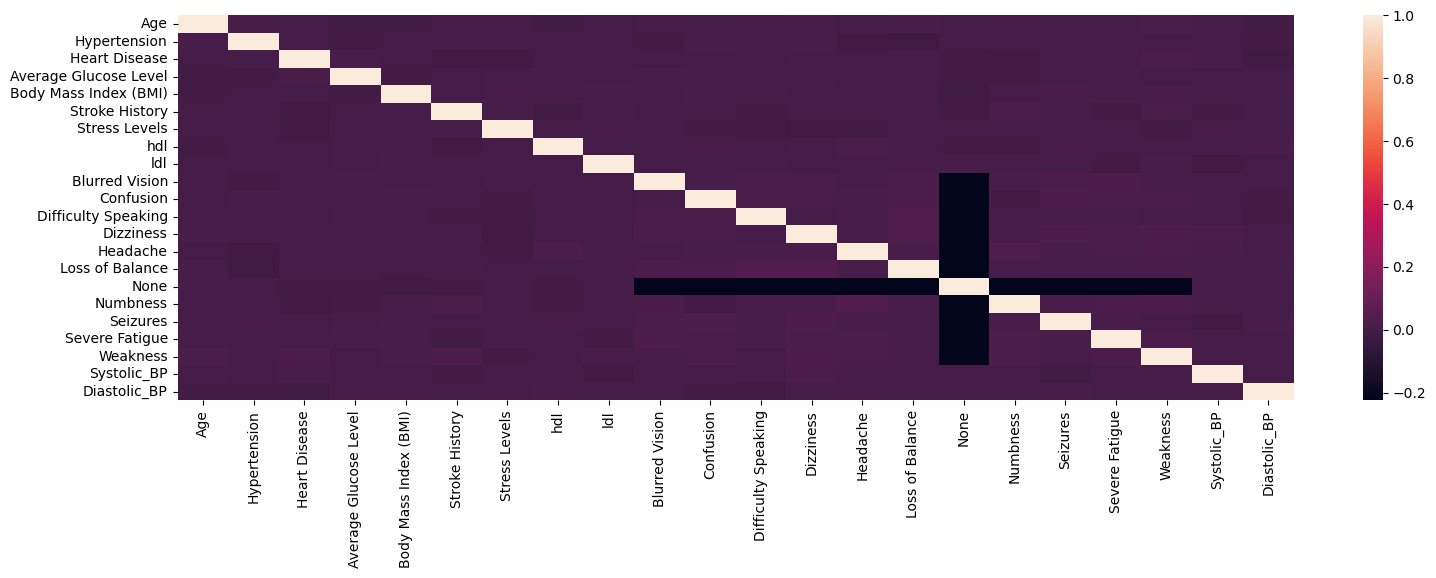

In [143]:
# Let's check the correlation matrix
corr = df_out.select_dtypes(["int64", "float64"]).corr()
corr
sns.heatmap(corr);

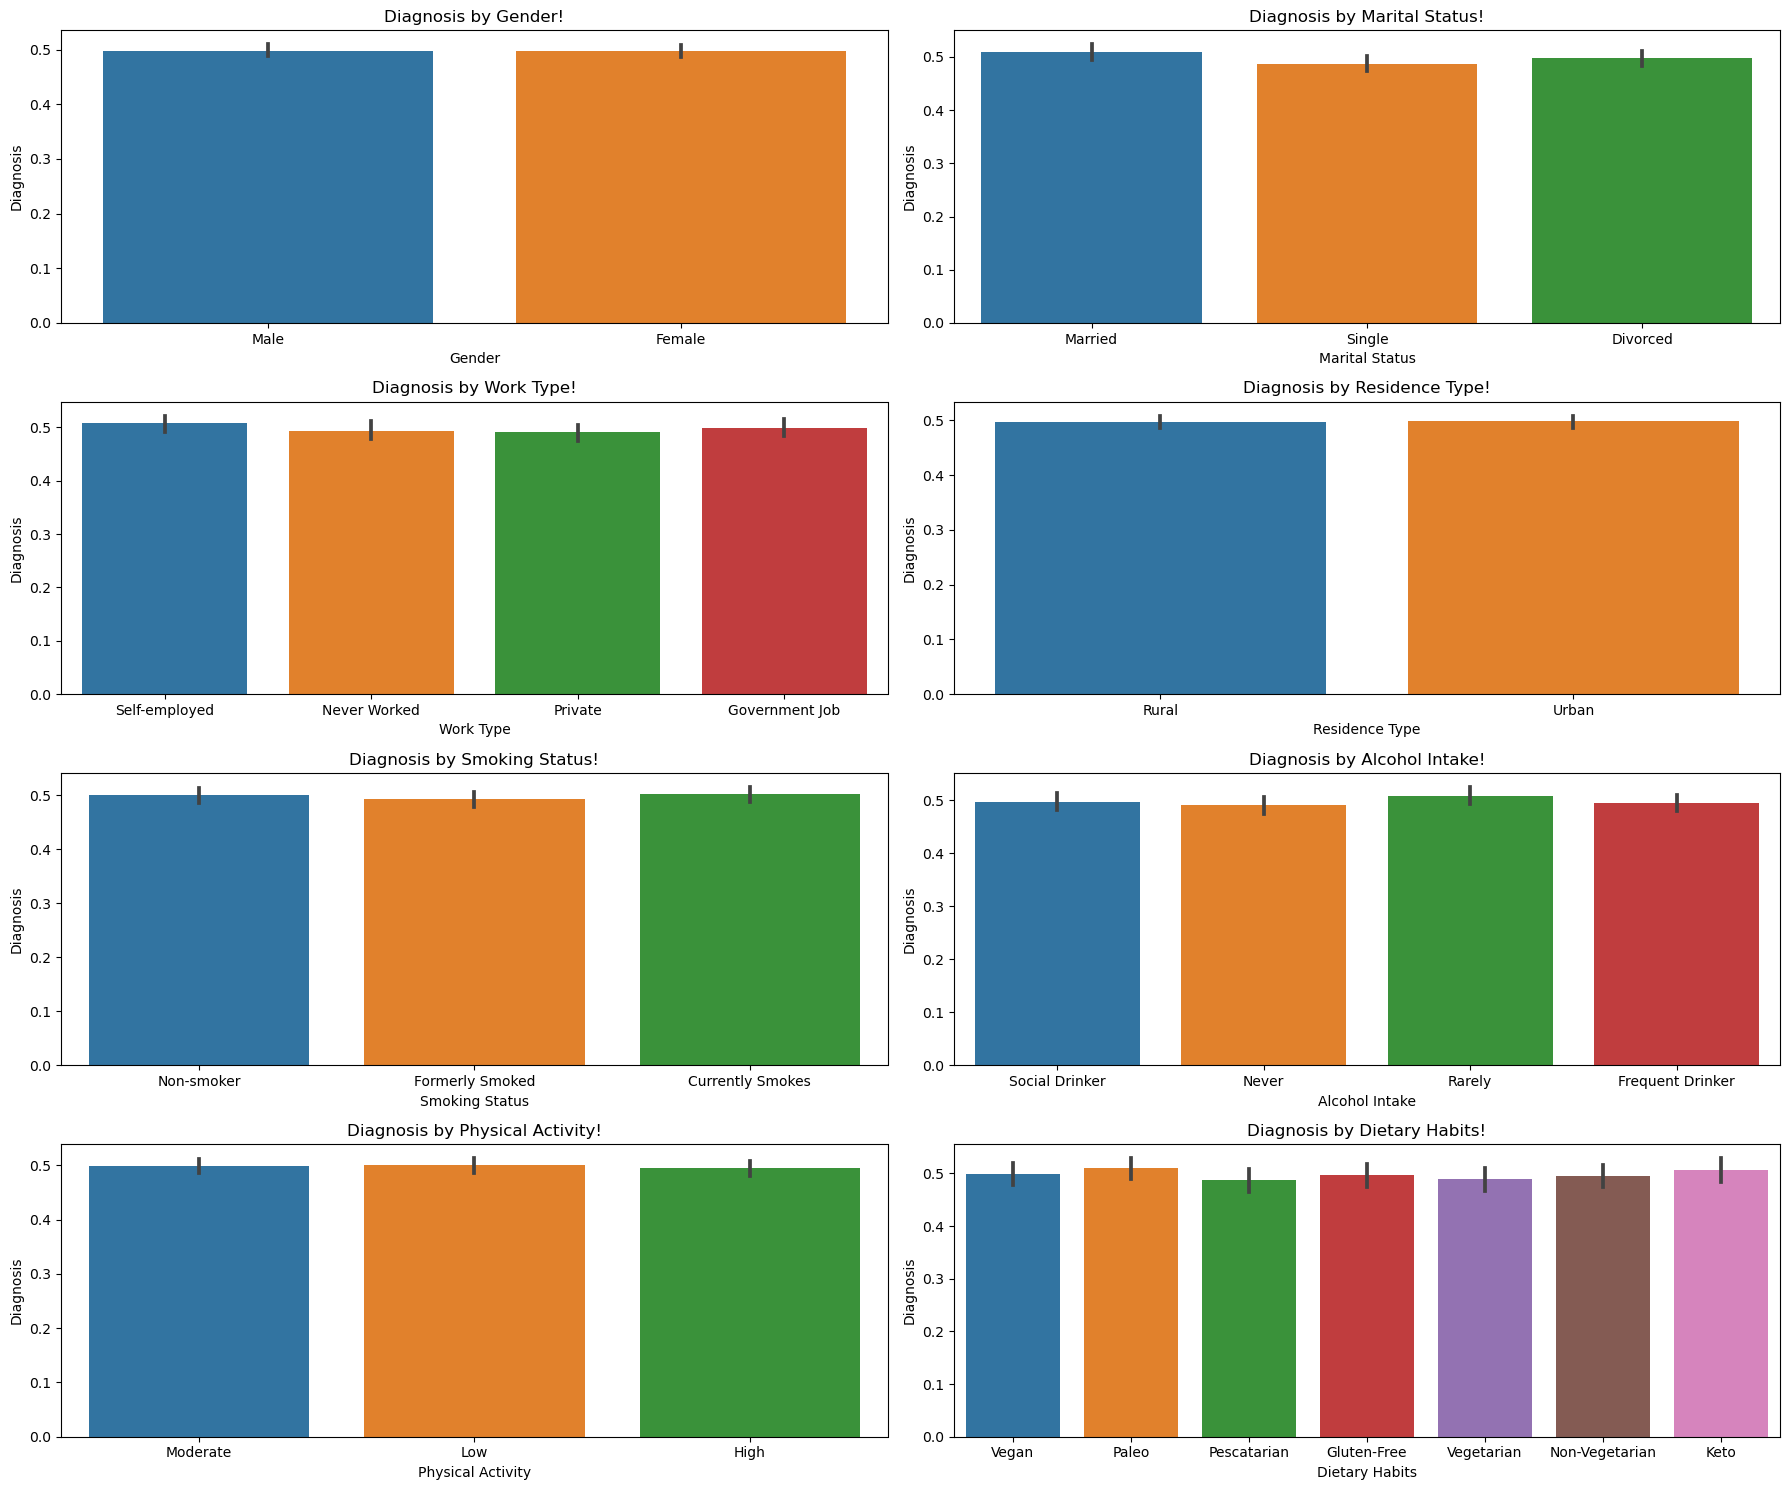

In [156]:
fig, axs = plt.subplots(4, 2, figsize=(18, 15));
row=0
col=0
obj_list = df_out.select_dtypes("object").columns.to_list()
for index, column in enumerate(obj_list):
    axis = axs[row, col]
    sns.barplot(x=column, y='Diagnosis', data=df_out, ax=axis);
    axis.set_title(f'Diagnosis by {obj_list[index]}!')
    col = col+1
    if(col>1): 
        row=row+1
        col=0
fig.tight_layout()
plt.show()